# OCEAN to MBTI


## Correlation matrix
[Статья](https://reunir.unir.net/bitstream/handle/123456789/9799/ijimai20142_7_4_pdf_92105.pdf?sequence=1&isAllowed=y)

| | Extraversion | Openness | Agreeableness | Conscientiousness | Neuroticism |
| --- | ------------ | -------- | ------------- | ----------------- | ----------- |
| E-I | -0.74 | 0.03 | -0.03 | 0.08 | 0.16 |
| S-N | 0.10 | 0.72 | 0.04 | -0.15 | -0.06 |
| T-F | 0.19 | 0.02 | 0.44 | -0.15 | 0.06 |
| J-P | 0.15 | 0.30 | -0.06 | -0.49 | 0.11 |

In [80]:
%load_ext autoreload
%autoreload 2

In [81]:
import numpy as np
import pandas as pd

In [82]:
correlation_matrix = pd.DataFrame({
    "E-I": np.array([-0.74, 0.03, -0.03, 0.08, 0.16]),
    "S-N": np.array([0.10, 0.72, 0.04, -0.15, -0.06]),
    "T-F": np.array([0.19, 0.02, 0.44, -0.15, 0.06]),
    "J-P": np.array([0.15, 0.30, -0.06, -0.49, 0.11]),
}, index = ['Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness', 'Neuroticism'])
correlation_matrix

,E-I,S-N,T-F,J-P
Extraversion,-0.74,0.10,0.19,0.15
Openness,0.03,0.72,0.02,0.30
Agreeableness,-0.03,0.04,0.44,-0.06
Conscientiousness,0.08,-0.15,-0.15,-0.49
Neuroticism,0.16,-0.06,0.06,0.11


In [83]:
correlation_matrix.T

,Extraversion,Openness,Agreeableness,Conscientiousness,Neuroticism
E-I,-0.74,0.03,-0.03,0.08,0.16
S-N,0.10,0.72,0.04,-0.15,-0.06
T-F,0.19,0.02,0.44,-0.15,0.06
J-P,0.15,0.30,-0.06,-0.49,0.11


In [84]:
def ocean_to_mbti(ocean_vector):
    """
    Конвертирует OCEAN-представление в MBTI на основе корреляционной матрицы.
    :param ocean_vector: np.array с пятью значениями OCEAN в порядке [E, O, A, C, N]. Значение от 0 до 1 (степень выраженности черты)
    :return: строка с типом MBTI
    """
    mbti_vector = {}
    
    # Рассчитываем значение каждой шкалы MBTI
    for scale, weights in correlation_matrix.items():
        mbti_vector[scale] = np.dot(ocean_vector, weights)
    
    mbti_type = (
        "E" if mbti_vector["E-I"] > 0.5 else "I",
        "N" if mbti_vector["S-N"] > 0.5 else "S",
        "F" if mbti_vector["T-F"] > 0.5 else "T",
        "P" if mbti_vector["J-P"] > 0.5 else "J",
    )
    
    return "".join(mbti_type)

In [85]:
ocean_vector = np.array([0.6, 0.7, 0.2, 0.1, 0.3])
mbti_type = ocean_to_mbti(ocean_vector)
print("Тип личности MBTI:", mbti_type)

Тип личности MBTI: INTJ


In [86]:
import pickle
import pandas as pd
import numpy as np
import os
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from itertools import product
import seaborn as sns
from scipy.stats import pearsonr
from tqdm import tqdm
from sklearn.metrics.pairwise import rbf_kernel
from sklearn import svm
import numpy as np
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
# candidates_emb = []
# user_ids = []
# for i in os.listdir('data/embeddings/users'):
#     full_path = f'data/embeddings/users/{i}'
#     if not os.path.isdir(full_path):
#         emb = np.load(full_path)
#         candidates_emb.append(emb)
#         user_ids.append(i)
# candidates_emb = np.array(candidates_emb)

# vacancies_emb = []
# for i in os.listdir('data/embeddings/vacancies/'):
#     emb = np.load(f'data/embeddings/vacancies/{i}')
#     vacancies_emb.append(emb)
# vacancies_emb = np.array(vacancies_emb)

# types_emb = []
# for i in os.listdir('data/embeddings/personalities/'):
#     if int(i[:-4]) > 16:
#         emb = np.load(f'data/embeddings/personalities/{i}')
#         types_emb.append(emb)
# types_emb = np.array(types_emb)

# # vacancies_data = pd.read_csv('data/tables/vacancies.csv')
# # types_data = pd.read_csv('data/tables/personality.csv')
# with open('data/train/transcription.pkl', 'rb') as file:
#     candidates_data = pickle.load(file)

with open('data/test_submit.pkl', 'rb') as file:
    submit_data = pickle.load(file)

with open('inference/ocean_results.pkl', 'rb') as file:
    result = pickle.load(file)

with open('inference/mbti_results.pkl', 'rb') as file:
    mbti_result = pickle.load(file)

In [138]:
[min(result[k].values()) for k in result], [max(result[k].values()) for k in result]

([0.4123807, 0.41463548, 0.39935756, 0.42897218, 0.40034074],
 [0.69250906, 0.72175324, 0.73855865, 0.7256338, 0.7080215])

In [139]:
[min(submit_data[k].values()) for k in submit_data], [max(submit_data[k].values()) for k in submit_data]

([0.0001645076602383444,
  0.0006885144493656847,
  0.00013795636313695958,
  0.00021614370463673982,
  0.000539417001239495],
 [0.9998833646664682,
  0.9998610198162415,
  0.9998353677510236,
  0.9987054420443315,
  0.9989938763452739])

In [316]:
def compute_similarity_matrix(user_embeddings, type_embeddings):
    # Функция для вычисления корреляции Пирсона между векторами
    similarity = []
    for user_embedding in tqdm(user_embeddings):
        similarity_vector = []
        for type_embedding in type_embeddings:
            corr, _ = pearsonr(user_embedding, type_embedding)  # Корреляция Пирсона
            similarity_vector.append((corr + 1) / 2)  # Преобразуем корреляцию в диапазон [0, 1]
        similarity.append(similarity_vector)
    return np.array(similarity)

def compute_similarity_matrix_with_kernel(user_embeddings, type_embeddings, gamma=1.0):
    similarity_matrix = []

    # Применяем RBF ядро для каждого эмбеддинга пользователя с каждым типом
    for user_embedding in tqdm(user_embeddings):
        similarity_vector = []
        for type_embedding in type_embeddings:
            similarity_score = rbf_kernel(user_embedding.reshape(1, -1), type_embedding.reshape(1, -1), gamma=gamma)
            similarity_vector.append(similarity_score[0][0])  # Сохраняем сходство
        similarity_matrix.append(similarity_vector)
    
    return np.array(similarity_matrix)

def compute_similarity_matrix(user_embeddings, type_embeddings):
    return (cosine_similarity(user_embeddings, type_embeddings) + 1) / 2

In [317]:
types_emb.shape, candidates_emb.shape

((5, 384), (8000, 384))

In [318]:
similarity_matrix = compute_similarity_matrix(candidates_emb, types_emb)
# similarity_matrix = cosine_similarity(candidates_emb, types_emb)

In [319]:
candidates_emb.shape

(8000, 384)

In [320]:
print(similarity_matrix.shape)
similarity_matrix

(8000, 5)


array([[0.55274343, 0.51264745, 0.56522655, 0.500856  , 0.5220037 ],
       [0.5133459 , 0.51287276, 0.54694265, 0.52170944, 0.5072503 ],
       [0.49509317, 0.48928064, 0.53133345, 0.5009376 , 0.47418842],
       ...,
       [0.4790883 , 0.46749443, 0.4995128 , 0.48162767, 0.4490532 ],
       [0.5139392 , 0.5247809 , 0.52007735, 0.52559716, 0.494794  ],
       [0.59189075, 0.5792598 , 0.6173902 , 0.577751  , 0.5817775 ]],
      dtype=float32)

In [321]:
similarity_matrix.min(), similarity_matrix.max()

(0.40175423, 0.6594507)

## Personality heatmap

<Axes: >

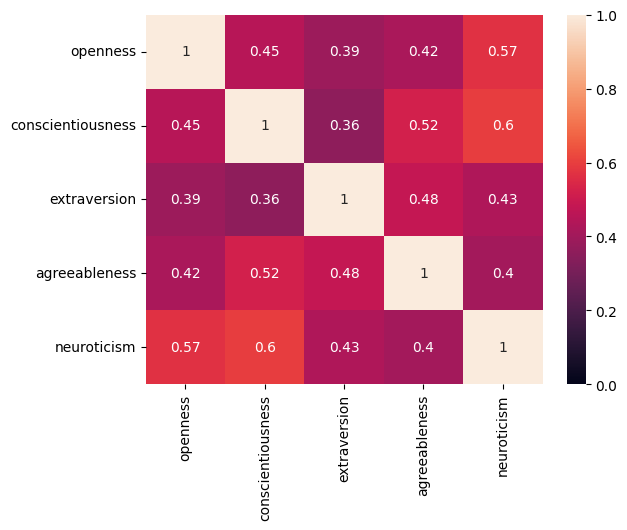

In [322]:
sns.heatmap(types_emb.dot(types_emb.T), vmin=0, vmax=1, xticklabels=['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism'],
            yticklabels=['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism'],
            annot=True)

## PCA

In [323]:
pca = PCA(n_components=2)
ocean_data_pca = pca.fit_transform(similarity_matrix)

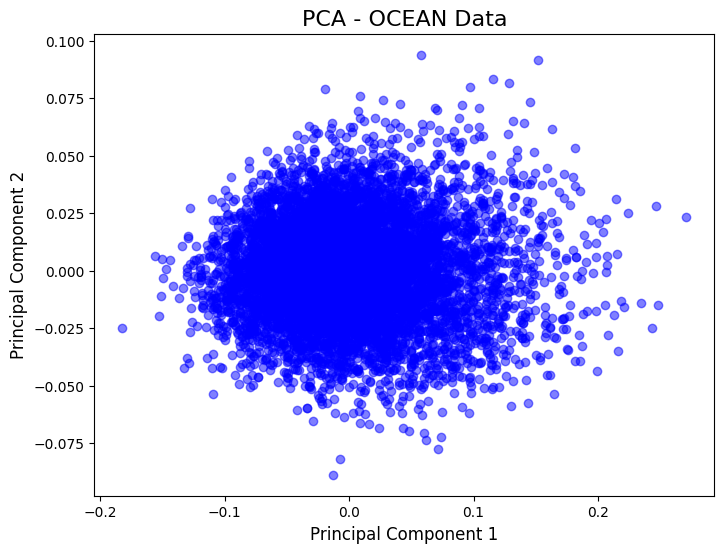

In [324]:
plt.figure(figsize=(8, 6))
plt.scatter(ocean_data_pca[:, 0], ocean_data_pca[:, 1], c='blue', marker='o', alpha=0.5)
plt.title('PCA - OCEAN Data', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.show()

In [325]:
# 3. Применение t-SNE для уменьшения размерности до 2
tsne = TSNE(n_components=2, random_state=42)
ocean_data_tsne = tsne.fit_transform(similarity_matrix)

KeyboardInterrupt: 

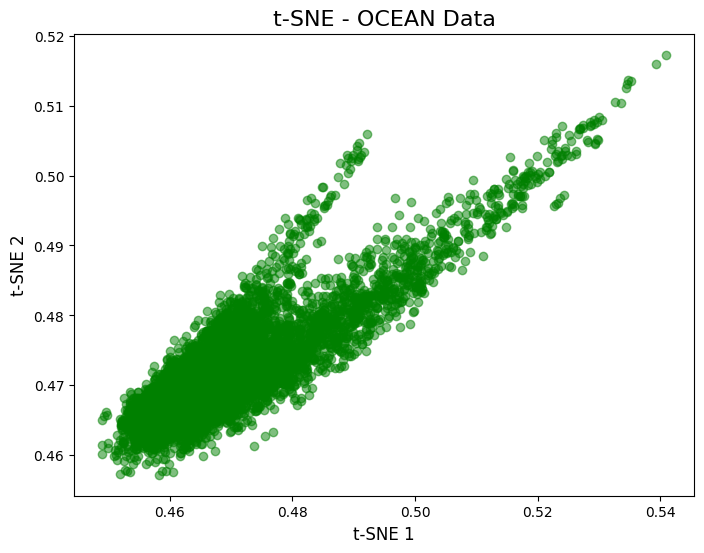

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(similarity_matrix[:, 0], similarity_matrix[:, 1], c='green', marker='o', alpha=0.5)
plt.title('t-SNE - OCEAN Data', fontsize=16)
plt.xlabel('t-SNE 1', fontsize=12)
plt.ylabel('t-SNE 2', fontsize=12)
plt.show()

## Clasterisation

In [326]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(similarity_matrix)

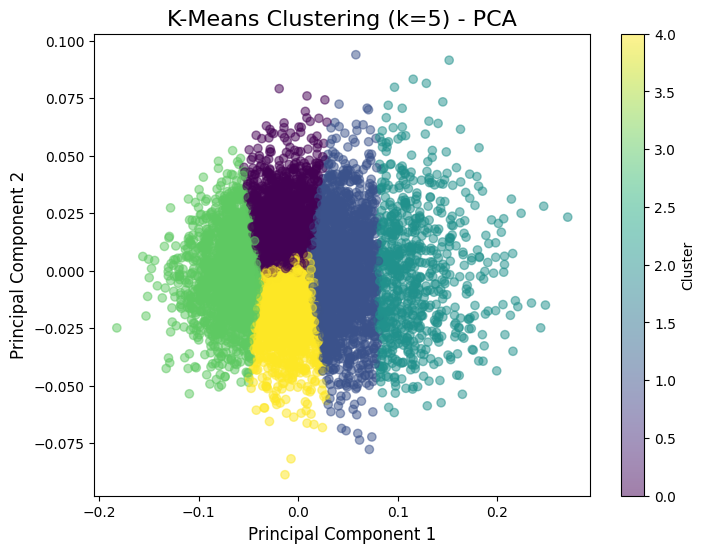

In [327]:
plt.figure(figsize=(8, 6))
plt.scatter(ocean_data_pca[:, 0], ocean_data_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o', alpha=0.5)
plt.title('K-Means Clustering (k=5) - PCA', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.colorbar(label='Cluster')
plt.show()

In [328]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(similarity_matrix)

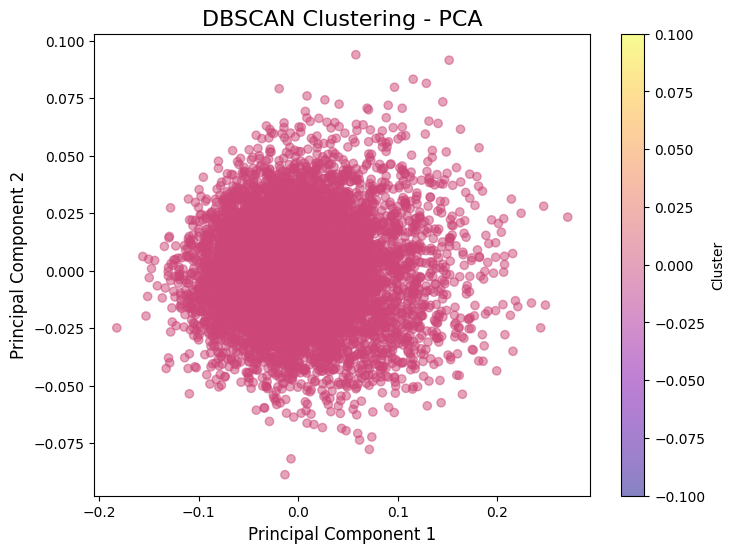

In [329]:
plt.figure(figsize=(8, 6))
plt.scatter(ocean_data_pca[:, 0], ocean_data_pca[:, 1], c=dbscan_labels, cmap='plasma', marker='o', alpha=0.5)
plt.title('DBSCAN Clustering - PCA', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.colorbar(label='Cluster')
plt.show()

## Submission

In [330]:
from src.modelling.submit import submit

submit_dict = submit(user_embedding_folder='data/embeddings/users', type_embeddings_folder='data/embeddings/personalities')
submit_dict

100%|██████████| 8002/8002 [00:40<00:00, 195.47it/s]


{'openness': {'8hW6WfYBP18.000.mp4': 0.5530340866550887,
  'YF2QVn1fK1E.002.mp4': 0.5132099528373715,
  'bej-DbxTkWA.001.mp4': 0.4951030347563119,
  'VIKk25Ozx40.000.mp4': 0.48045940473071447,
  '_LWrd9t4oZw.003.mp4': 0.48831951533077245,
  'xHb5_bc1JOA.005.mp4': 0.4600717126320433,
  'PHv6CzBIC5E.004.mp4': 0.5167122503524979,
  'KNOHhnRMpSw.002.mp4': 0.4658754347676677,
  'MuYYY3XaJ7Q.003.mp4': 0.4750937908451718,
  'Etfh8X-ECtY.002.mp4': 0.4706605373482944,
  '5BPGRteF64Y.005.mp4': 0.47678285448019153,
  '2oiXF5_gTyk.000.mp4': 0.5100221759038845,
  'hhdoeK8SsiI.003.mp4': 0.4894645363435757,
  '_YYBXI2mXv4.000.mp4': 0.5152690389015575,
  'rhKVPhhWHko.002.mp4': 0.5239469265357002,
  '9QGTbcqb2tM.002.mp4': 0.4702652552726363,
  'xzRYaxrhne8.003.mp4': 0.5033811673206401,
  'LCafv-LfC3Y.002.mp4': 0.512147044109085,
  'QovE6L-C9VY.000.mp4': 0.5436528756050052,
  '7wsksuXYoMY.005.mp4': 0.45139685193197465,
  '9eNHxfOV2Kg.004.mp4': 0.4781578060556626,
  'ay4cdKr1I0o.002.mp4': 0.4956870615390

## MBTI

In [102]:
import pickle


In [104]:
from src.modelling.mbti import ocean_to_mbti, ocean_to_mbti_vector

mbti_scales = ['E-I', 'S-N', 'T-F', 'J-P']
ocean_scales = ['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism']

# similarity_matrix2 = (similarity_matrix - similarity_matrix.min()) / (similarity_matrix.max() - similarity_matrix.min())
mbti_types = np.array([ocean_to_mbti_vector(similarity_matrix[i]) for i in range(len(similarity_matrix))])

NameError: name 'similarity_matrix' is not defined

In [363]:
mbti_char = np.array([ocean_to_mbti(similarity_matrix[i]) for i in range(len(similarity_matrix))])
np.unique(mbti_char)

array(['Adventurer (ISFP)', 'Architect (INTJ)', 'Debater (ENTP)',
       'Entrepreneur (ESTP)', 'Executive (ESTJ)', 'Inspector (ISTJ)',
       'Logician (INTP)', 'Mediator (INFP)', 'Virtuoso (ISTP)'],
      dtype='<U19')

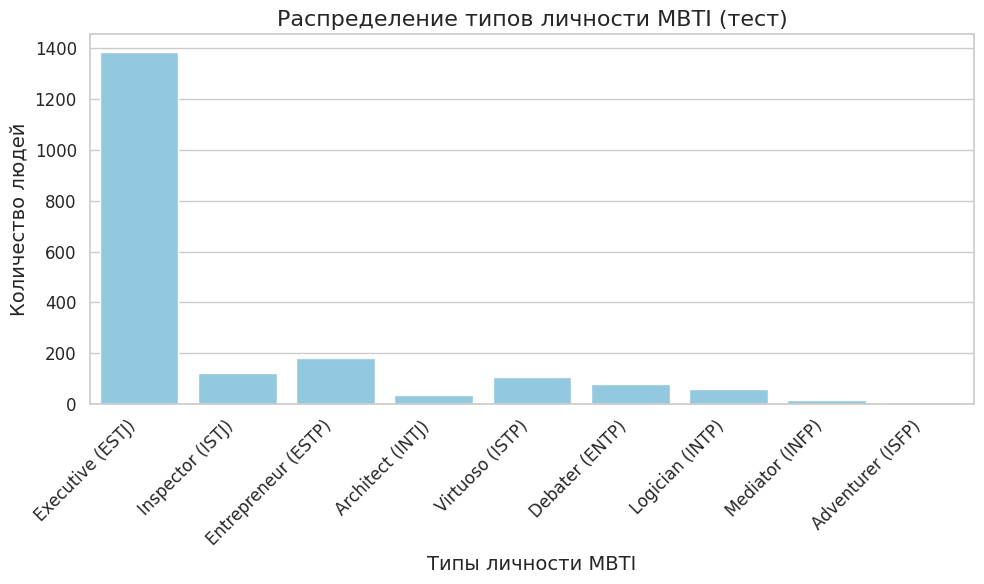

In [141]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
# ax = sns.countplot(x=mbti_char, color='skyblue')
ax = sns.countplot(x=mbti_result, color='skyblue')

ax.set_title('Распределение типов личности MBTI (тест)', fontsize=16)
ax.set_xlabel('Типы личности MBTI', fontsize=14)
ax.set_ylabel('Количество людей', fontsize=14)

# Поворот меток на оси X для лучшей читаемости
plt.xticks(rotation=45, ha='right', fontsize=12)

# Устанавливаем размер шрифта для осей Y
ax.tick_params(axis='y', labelsize=12)

# Отображаем график
plt.tight_layout()
plt.show()

/tmp/ipykernel_1114504/1275786954.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


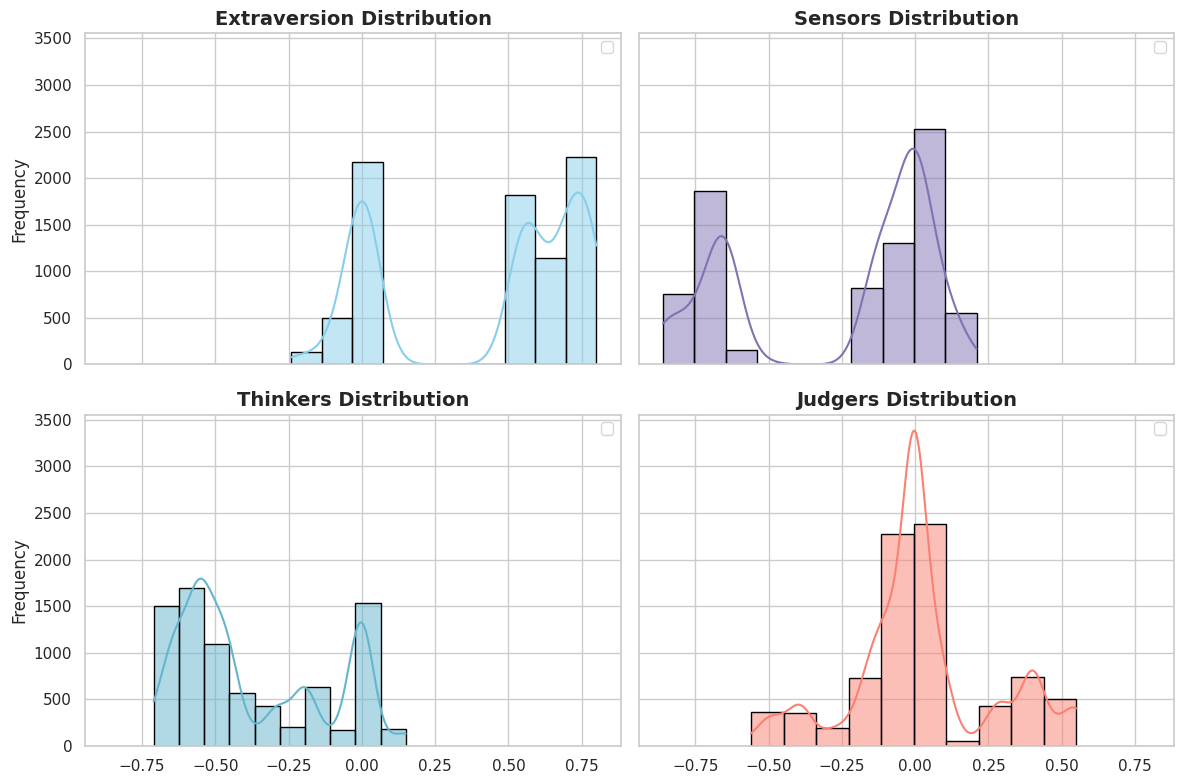

In [368]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

sns.histplot(mbti_types[:, 0], ax=axs[0, 0], color='skyblue', kde=True, bins=10, edgecolor='black')
sns.histplot(mbti_types[:, 1], ax=axs[0, 1], color='m', kde=True, bins=10, edgecolor='black')
sns.histplot(mbti_types[:, 2], ax=axs[1, 0], color='c', kde=True, bins=10, edgecolor='black')
sns.histplot(mbti_types[:, 3], ax=axs[1, 1], color='salmon', kde=True, bins=10, edgecolor='black')

for ax, trait in zip(axs.ravel(), ['Extraversion', 'Sensors', 'Thinkers', 'Judgers']):
    ax.set_title(f'{trait} Distribution', fontsize=14, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=12)
    ax.legend()

plt.tight_layout()
plt.show()

In [353]:
labels = ['Extraversion (E) – Introversion (I)', 
          'Sensing (S) – Intuition (N)', 
          'Thinking (T) – Feeling (F)', 
          'Judging (J) – Perceiving (P)']
mbti_table = pd.DataFrame(mbti_types, columns = labels)

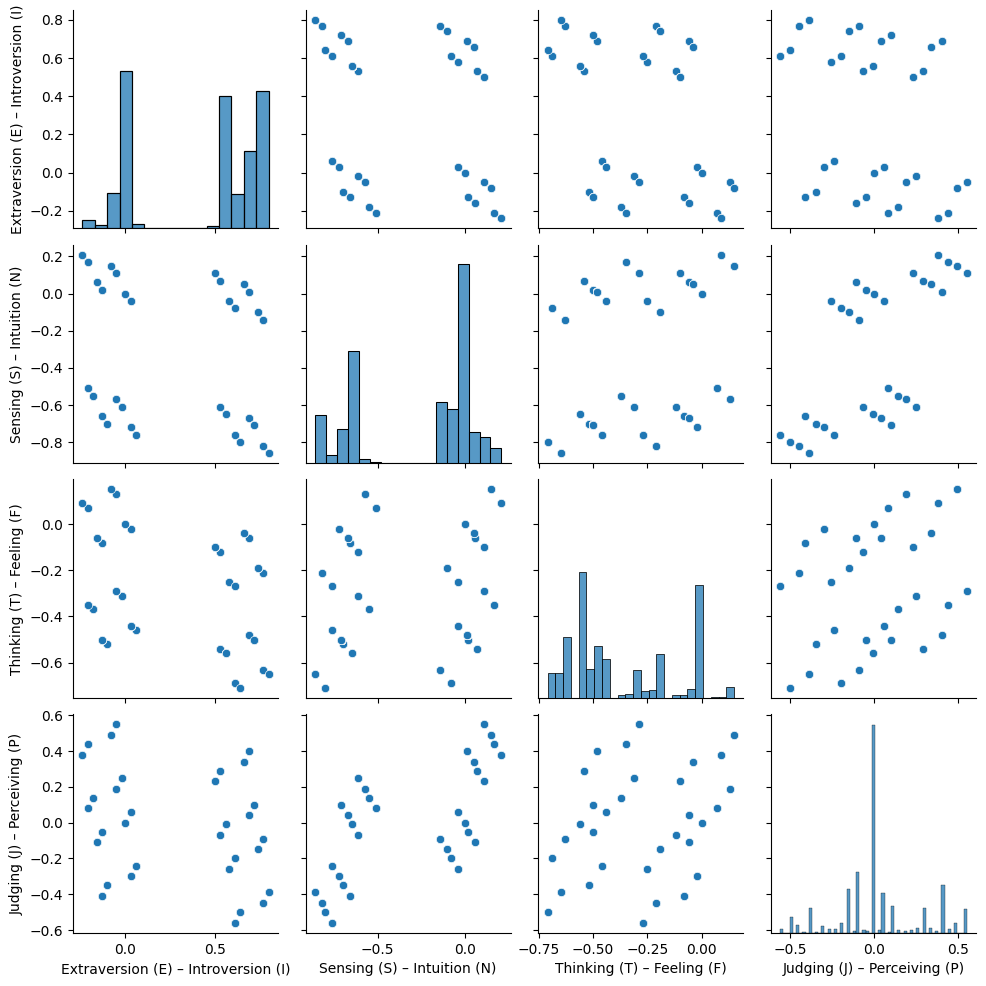

In [354]:
sns.pairplot(mbti_table)

In [8]:
import pickle
with open('data/mbti_train_val.pkl', 'rb') as file:
    mbti_dict = pickle.load(file)

In [9]:
mbti_dict

{'8hW6WfYBP18.000.mp4': 'Executive (ESTJ)',
 'YF2QVn1fK1E.002.mp4': 'Executive (ESTJ)',
 'bej-DbxTkWA.001.mp4': 'Executive (ESTJ)',
 'VIKk25Ozx40.000.mp4': 'Entrepreneur (ESTP)',
 '_LWrd9t4oZw.003.mp4': 'Entrepreneur (ESTP)',
 'xHb5_bc1JOA.005.mp4': 'Inspector (ISTJ)',
 'PHv6CzBIC5E.004.mp4': 'Executive (ESTJ)',
 'KNOHhnRMpSw.002.mp4': 'Inspector (ISTJ)',
 'MuYYY3XaJ7Q.003.mp4': 'Entrepreneur (ESTP)',
 'Etfh8X-ECtY.002.mp4': 'Entrepreneur (ESTP)',
 '5BPGRteF64Y.005.mp4': 'Executive (ESTJ)',
 '2oiXF5_gTyk.000.mp4': 'Executive (ESTJ)',
 'hhdoeK8SsiI.003.mp4': 'Executive (ESTJ)',
 '_YYBXI2mXv4.000.mp4': 'Executive (ESTJ)',
 'rhKVPhhWHko.002.mp4': 'Executive (ESTJ)',
 '9QGTbcqb2tM.002.mp4': 'Debater (ENTP)',
 'xzRYaxrhne8.003.mp4': 'Executive (ESTJ)',
 'LCafv-LfC3Y.002.mp4': 'Virtuoso (ISTP)',
 'QovE6L-C9VY.000.mp4': 'Executive (ESTJ)',
 '7wsksuXYoMY.005.mp4': 'Entrepreneur (ESTP)',
 '9eNHxfOV2Kg.004.mp4': 'Inspector (ISTJ)',
 'ay4cdKr1I0o.002.mp4': 'Debater (ENTP)',
 'e07IozLUeKc.005.mp4'

In [62]:
import subprocess
import os
from tqdm import tqdm

back = pd.read_csv('data/tables/embeddings.csv', index_col=0)
back = back.drop_duplicates()
back.index = np.arange(len(back))

back_users = back[back['url'].str.contains('users')].iloc[:8000]

train_video_folder = 'data/train/video'
val_video_folder = 'data/validation/video'

for idx in tqdm(range(len(back_users))):
    raw = back_users.iloc[idx]

    user_id = raw['url'].split('/')[-1][:-4]
    user_video_name = user_id + '.mp4'
    user_idx = int(raw.name)

    if user_video_name in os.listdir(train_video_folder):
        video_full_path = f'{train_video_folder}/{user_video_name}'
        subprocess.run(f'cp {video_full_path} data/files/{user_idx}.mp4', shell=True)

    elif user_video_name in os.listdir(val_video_folder):
        video_full_path = f'{val_video_folder}/{user_video_name}'
        subprocess.run(f'cp {video_full_path} data/files/{user_idx}.mp4', shell=True)

100%|██████████| 8000/8000 [03:04<00:00, 43.45it/s]


In [63]:
back_users

,url
5,./data/embeddings/users/0C6i34q2-f8.000.npy
6,./data/embeddings/users/0C6i34q2-f8.001.npy
7,./data/embeddings/users/0C6i34q2-f8.003.npy
8,./data/embeddings/users/0D7W2pR4RpQ.004.npy
9,./data/embeddings/users/0FVu7VKIg2s.000.npy
...,...
8000,./data/embeddings/users/zxuPCshTSOs.005.npy
8001,./data/embeddings/users/zyGz_H1UTnQ.002.npy
8002,./data/embeddings/users/zyGz_H1UTnQ.003.npy
8003,./data/embeddings/users/zyGz_H1UTnQ.004.npy


In [57]:
all(back_users.iloc[:8000].values == back_users.iloc[8000:16000].values)

True

In [54]:
back_users.iloc[8000:16000]

,url
8000,./data/embeddings/users/0C6i34q2-f8.000.npy
8001,./data/embeddings/users/0C6i34q2-f8.001.npy
8002,./data/embeddings/users/0C6i34q2-f8.003.npy
8003,./data/embeddings/users/0D7W2pR4RpQ.004.npy
8004,./data/embeddings/users/0FVu7VKIg2s.000.npy
...,...
15995,./data/embeddings/users/zxuPCshTSOs.005.npy
15996,./data/embeddings/users/zyGz_H1UTnQ.002.npy
15997,./data/embeddings/users/zyGz_H1UTnQ.003.npy
15998,./data/embeddings/users/zyGz_H1UTnQ.004.npy
